# X Millennials, Final Project Part 3

## April 30 2018

## Group Members:
* Ashley Hetrick
* Monica Porteanu
* Pravesh Humane
* Rishabh Mulani

### Our data storytelling principles
A.	Team collaboration: learning from and leveraging each other<br>
B.	Continuously probing the outcome with the 3 class questions: 
        1. What is the visualization trying to say? 
        2. What are its methods? 
        3. Is it effective? What are the strenghts / weaknesses?
C.	Minimalism: careful use of graphics and colours<br>
D.	Story has an arc: from each character’s perspective

#### Characters
1.	City of Urbana
2.	People being arrested
3.	Us as a team

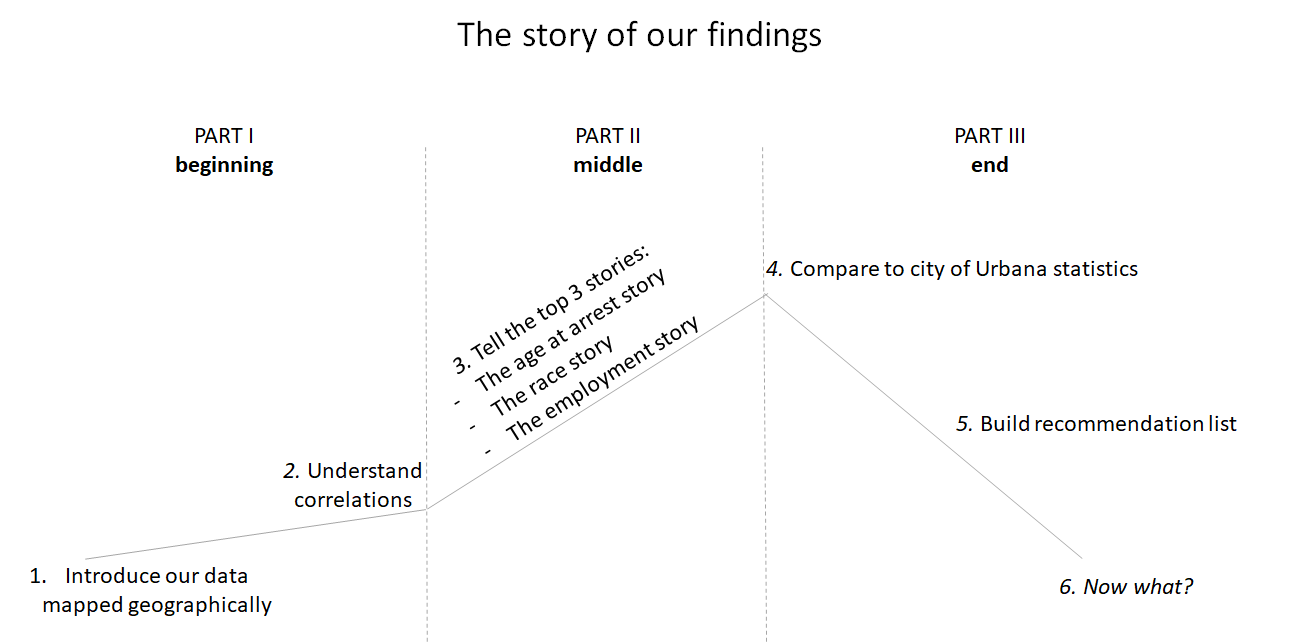

## Section 1: About our Data File

### 1. Name of the Dataset: 
Urbana Police Arrests Since 1988
### 2. Obtained from: City of Urbana Open Data 
* URL To access Terms of Use: https://data.urbanaillinois.us/terms-of-use

### 3. License Details: 
The City of Urbana has released this and many other datasets under open licenses. The Open Data license agreement reads: "The City now grants you a worldwide, royalty-free, non-exclusive license to use, modify, and distribute the datasets in all current and future media and formats for any lawful purpose. You now acknowledge that this license does not give you a
copyright or any other proprietary interest in the datasets. If you distribute or provide access to these datasets to any other person, whether in original or modified form, you agree to include a copy of, or the Uniform Resource Locator (URL) for, these Terms of Use and to ensure that any such person agrees to, and is bound by, these Terms of Use without introducing
any further restrictions of any kind."

### 4. Dataset Size & Other details:
* Number of Rows: 197,562
* Number of Columns: 26
* File size: Approx 51 MB

### 5. Instructions to access the data file:
* Please download the data file from : https://data.urbanaillinois.us/Police/Urbana-Police-Arrests-Since-1988/afbd-8beq
* Change the data_directory variable below to your storage directory

In [1]:
#set your data directory here (this is where the file exists on your jupyterhub server instance/local machine)
data_directory = '/home/rmulani2'

filename = 'Urbana_Police_Arrests_Since_1988.csv'

In [2]:
%matplotlib inline

#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import ipywidgets

import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as offline                                               # to use plotly in offline mode
from bqplot import *
import bqplot.pyplot as bqpyplt
import bqplot
from ipywidgets import Layout
from IPython.display import display, clear_output, Image

import warnings                                                               # to not show warnings  
import sys                                                                    # for memory cleanup

init_notebook_mode(connected=True)                                            # to instruct plotly that an offline conntection has been established
pd.options.mode.chained_assignment = None                                     # to ignore the error of a dataframe being set on a copy of a dataframe
warnings.filterwarnings('ignore')                                             # ignore warnings

In [3]:
full_path = os.path.join(data_directory,filename)

In [4]:
#colors 
blue = sns.color_palette('Blues')
grey = sns.color_palette('Greys')
red = sns.color_palette('Reds')
orange = sns.color_palette('Oranges')

In [5]:
progress_bar = ipywidgets.IntProgress(min = 0, max = 100, value = 0)
label_pb=ipywidgets.Label("Progress Bar:")
label_warning=ipywidgets.Label("Warning: loading all years data may take several minutes depending on your computer's/server's computing power")
hbox = ipywidgets.HBox(children = [label_pb, progress_bar])

In [6]:
# function to erase axes
def erase_axes():
    locations = ['top', 'bottom', 'left', 'right']
    for location in locations:
        plt.gca().spines[location].set_visible(False)

In [7]:
# df = pd.read_csv('MonicaProject/data/Urbana_Police_Arrests_Since_1988.csv',
#                 parse_dates = ['DATE OF ARREST'], thousands=',')

# getting warning 'Columns (15,22) have mixed types. Specify dtype option on import or set low_memory=False.'
# df.columns[15]
# column 15 is 'AGE AT ARREST', which we identified in Part 1 that it has mixed data types          
                 
# df.columns[22]
# column 22 is 'ARRESTEE HOME ZIP', which should be zipcode, usually as string 

# Let's fix these 2 columns, plus setting the data types needed for further analysis
df = pd.read_csv(full_path, 
                 delimiter = ',', 
                 index_col = 'ARREST NUMBER',
                 dtype={'YEAR OF ARREST': np.int64,               # values: 1988 through 2018, with some blancks
                        'MONTH OF ARREST': np.int64,              # values: 1-12
                        'CRIME CODE': np.int64,                   # sample: 4310; has adjacent field CRIME_CODE_DESCRIPTION 
                        'DISPOSITION CODE': np.int64,             # sample: 87; seem to be about 12 plus blanks; has adjacent field DISPOSITION_DESCRIPTION; 
                        'AGE AT ARREST': np.int64,                # values: 0 to 91, with several rows above 1000
                        'COUNT': np.int64,                        # values: 1 or blank
                        'CONSPIRACY CODE': 'str',                 # values: ATTEMPT; CONSPIRACY; SOLICITATION; 1; 9; 4
                        # 'STATUTE'                               # sample: 720-5/19-2 - looks very cryptic; lots of them
                        # 'VIOLATION'                             # sample: BURGLARY TOOLS-POSSESSION; lots of them
                        'ARREST TYPE DESCRIPTION': 'str',         # values: SUMMONED,ON VIEW, WARRANT ARREST, TAKEN INTO CUSTODY 
                        'CRIME CATEGORY CODE': 'str',             # sample: C65; has adjacent field CRIME_CATEGORY_DESCRIPTION; should focus on the top used ones; there is a long tail of codes least used
                        'ARRESTEE SEX': 'str',                    # *values: MALE, FEMALE
                        'ARRESTEE RACE': 'str',                   # *values: WHITE, BLACK, ASIAN, HISPANIC, AMERICAN INDIAN/ALASKAN, BLANK, UNKWON, BUSINESS OTHER
                        'ARRESTEE EMPLOYMENT DESCRIPTION': 'str', # *values: UNKNOWN, UNEMPLOYED, EMPLOYED, FULL-TIME STUDENT, MILITARY
                        'ARRESTEE RESIDENCY DESCRIPTION': 'str',  # *values: RESIDENT, NON-RESIDENT, UNKNOWN
                        'ARRESTEE HOME CITY': 'str',              # values: lots
                        'ARRESTEE HOME STATE': 'str',             # values: lots but almost seem to be in one state, IL
                        'ARREST RESOLUTION': 'str',               # *values: TAKEN TO JAIL, BONDED OUT, INDIVIDUAL BOND, NOTICE TO APPEAR - CITY, PROMISE TO COMPLY
                        'ARRESTEE HOME ZIP': 'str'},              # when converted to int, it strips 0s; some 0s are Os though so not sure yet what to do here
                 na_values = {'ARRESTEE HOME ZIP': []},
                 parse_dates = ['DATE OF ARREST'],                # sample: 07/13/2009
                 thousands = ',',
                 error_bad_lines = False,             # skip erroneous lines 
                 warn_bad_lines = True)
# just in case, save this formatting to a file
#df.to_csv(os.path.join(data_directory,'arrests_all_initial.csv')

In [8]:
df_maps = pd.read_csv(full_path, dtype = {'AGE AT ARREST': np.int64}, thousands = ',')   # added thousands = ','
df_maps.reset_index(inplace = True)

In [9]:
# df.shape                           # 197562 rows * 25 columns                          
# df.columns[15]
# df.columns[22]                     
# df.describe()                      #no record(s) have been skipped with the above formatting
# df.dtypes            

## Introducing our data:
### Where does our story happen?


In [10]:
#Extracting rows where ARRESSTEE HOME CITY - MAPPED is not null
df_maps = df_maps[pd.notnull(df_maps['ARRESTEE HOME CITY - MAPPED'])]

In [11]:
#get city, state, zipcode, lat and lon
city = []
state = []
zipcode = []
lat = []
lon = []
ix_del_list = []
counter = 0

#DATA CLEANSING OPERATION
#splitting Home City Mapped to get city, state, zipcode, latitude and longitude
for index, record in zip(df_maps.index,df_maps['ARRESTEE HOME CITY - MAPPED']):
    try:
        city.append(record.split(',')[0])
        temp = record.split(',')[1]
        state.append(temp.split(' ')[1])
        temp1 = temp.split(' ')[2]
        zipcode.append(temp1.split('(')[0])
        lat.append(temp1.split('(')[1])
        temp3 = record.split(',')[2]
        lon.append(temp3.split(')')[0])
    except:
        #wherever I get an error while trying to parse the city, state, zipcode, lat or lon, I add that index and then delete those rows from my dataframe
        #because those rows contain data in an inconsistent format and also are missing information
        ix_del_list.append(index)
df_maps.drop(index=ix_del_list, inplace=True)

#faulty records deleted, now we'll run this code again in the next block to store city, state, zip, lat and lon values

In [12]:
#resetting city, state, zipcode, lat and lon to store non-redundant values
city = []
state = []
zipcode = []
lat = []
lon = []

#Data has finally been cleansed, now we can run the same code as above to get teh correct city, state, zipcode, latitude and longitude values
for record in df_maps['ARRESTEE HOME CITY - MAPPED']:
    #this time there's no possibility of errors as all erroneous rows have been deleted
    city.append(record.split(',')[0])
    temp = record.split(',')[1]
    state.append(temp.split(' ')[1])
    temp1 = temp.split(' ')[2]
    zipcode.append(temp1.split('(')[0])
    lat.append(temp1.split('(')[1])
    temp3 = record.split(',')[2]
    lon.append(temp3.split(')')[0])

city = pd.Series(city)
state = pd.Series(state)
zipcode = pd.Series(zipcode)
lat = pd.Series(lat)
lon = pd.Series(lon)

In [13]:
#Adding the new columns to the dataframe
df_maps['CITY'] = city.values
df_maps['STATE'] = state.values
df_maps['ZIPCODE'] = zipcode.values
df_maps['lat'] = lat.values
df_maps['lon'] = lon.values

In [14]:
#noticed some abnormal values, cleansing those
df_maps.loc[df_maps['CITY'].str.contains('CHAMAP'),'CITY'] = 'CHAMPAIGN'
df_maps.loc[df_maps['CITY'].str.contains('HMPAIGN'),'CITY'] = 'CHAMPAIGN'
df_maps.loc[df_maps['CITY'].str.contains('HAMPA'),'CITY'] = 'CHAMPAIGN'
df_maps.loc[df_maps['CITY'].str.contains('RBANA'),'CITY'] = 'URBANA'
df_maps.loc[df_maps['CITY'].str.contains('URANA'),'CITY'] = 'URBANA'
df_maps.loc[df_maps['CITY'].str.contains('URABAN'),'CITY'] = 'URBANA'
df_maps.loc[df_maps['CITY'].str.contains('URABNA'),'CITY'] = 'URBANA'
df_maps.loc[df_maps['CITY'].str.contains('URBAAN'),'CITY'] = 'URBANA'
df_maps.loc[df_maps['CITY'].str.contains('URBAN'),'CITY'] = 'URBANA'

#### Arrestee counts by state
As expected, the highest number of arrestees are from Illinois. For this plot, we'll neglect ILLINOIS as it skews the axis and is obviously the highest in terms of number of arrestees. Our intention is to visualize how the distribution of arrestees is from other states. Again, here we can expect neighbouring states (Indiana, Missouri etc.) to have higher numbers, but let's check if that premonition is correct.

In [15]:
#Creating a dataframe of arrestee count by state
grouped_states = pd.DataFrame(df_maps[['STATE','YEAR OF ARREST','ARREST NUMBER']].groupby(['STATE','YEAR OF ARREST']).count())
grouped_states.reset_index(inplace = True)

Our premonition of neighbouring states having higher number of arrestees is also deemed correct by the plot above. This is because access to IL is easiest from neighbouring states. However, one surprising finding is that the number of arrestees from Florida and Texas rank third and fourth respectively. This is interesting as Illinois is really far from Florida and Texas!

In [16]:
#grouping by city to view the arrestee count by home cities. 
#State has been added to this group by for labeling on the map and future use
grouped_cities = pd.DataFrame(df_maps[['ARREST NUMBER','YEAR OF ARREST','STATE','CITY']].groupby(['YEAR OF ARREST','STATE','CITY']).count())

In [17]:
grouped_cities.reset_index(inplace = True)

In [18]:
#taking city coordinates from the first occurence of each city
coord_dict={}
for city, lat, lon in zip(df_maps['CITY'], df_maps['lat'], df_maps['lon']):
    if city in coord_dict:
        pass
    else:
        coord_dict[city] = lat,lon
df_coordinates = pd.DataFrame(coord_dict).T

In [19]:
df_coordinates.reset_index(inplace=True)

In [20]:
df_coordinates.columns = ['CITY','lat','lon']
full_map_df = pd.merge(grouped_cities,df_coordinates, on='CITY')
full_map_df.columns = ['YEAR OF ARREST','STATE','CITY','ARREST_COUNT','lat','lon']
full_map_df = full_map_df.sort_values('ARREST_COUNT', ascending = True) 
#Ascending = True so that cities with larger arrest counts get plotted last so as to be visible even if coordinates are too close with another city

In [21]:
#setting the all_cities selected for the first city map display
all_cities_flag = True

In [22]:
#function to make the plotly usa map, plot cities and color them by the count of arrestees from that particular city
def make_map_plotly_city(plotting_df, year, city):
    
    copy_df = plotting_df.copy()
    if city == 'ALL CITIES':
        if year == 'ALL YEARS':
            plotting_df = pd.DataFrame(plotting_df.groupby('CITY').sum())
            plotting_df.reset_index(inplace = True)
            progress_bar.max = len(copy_df['CITY'].unique())
            progress_bar.value = 0
            for ct in copy_df['CITY'].unique():
                try:
                    plotting_df.loc[plotting_df['CITY']==ct,'lat'] = copy_df.loc[copy_df['CITY']==ct,'lat'].values
                except:
                    plotting_df.loc[plotting_df['CITY']==ct,'lat'] = copy_df.loc[copy_df['CITY']==ct,'lat'].values[0]
                    pass
                try:
                    plotting_df.loc[plotting_df['CITY']==ct,'lon'] = copy_df.loc[copy_df['CITY']==ct,'lon'].values
                except:
                    plotting_df.loc[plotting_df['CITY']==ct,'lon'] = copy_df.loc[copy_df['CITY']==ct,'lon'].values[0]
                try:
                    plotting_df.loc[plotting_df['CITY']==ct,'STATE'] = copy_df.loc[copy_df['CITY']==ct,'STATE'].values
                except:
                    plotting_df.loc[plotting_df['CITY']==ct,'STATE'] = copy_df.loc[copy_df['CITY']==ct,'STATE'].values[0]
#                 try:
#                     plotting_df.loc[plotting_df['CITY']==ct,'text'] = copy_df.loc[copy_df['CITY']==ct,'text'].values
#                 except:
#                     plotting_df.loc[plotting_df['CITY']==ct,'text'] = copy_df.loc[copy_df['CITY']==ct,'text'].values[0]
                progress_bar.value = progress_bar.value + 1
            plotting_df['text'] = plotting_df['CITY'] + ','+ plotting_df['STATE']+ ',' + ' NUMBER OF ARRESTS:' +\
                ''+ plotting_df['ARREST_COUNT'].astype(str)
            
        else:
            progress_bar.max = 100
            plotting_df = plotting_df.loc[plotting_df['YEAR OF ARREST'] == year]
            plotting_df['text'] = plotting_df['CITY'] + ','+ plotting_df['STATE']+ ',' + ' NUMBER OF ARRESTS:' +\
                ''+ plotting_df['ARREST_COUNT'].astype(str)
            progress_bar.value = 100
            
    else:
        if year == 'ALL YEARS':
            plotting_df = plotting_df.loc[plotting_df['CITY'] == city]
            plotting_df = pd.DataFrame(plotting_df.groupby('CITY').sum())
            plotting_df.reset_index(inplace = True)
            progress_bar.max = len(copy_df['CITY'].unique())
            progress_bar.value = 0
            for ct in copy_df['CITY'].unique():
                try:
                    plotting_df.loc[plotting_df['CITY']==ct,'lat'] = copy_df.loc[copy_df['CITY']==ct,'lat'].values
                except:
                    plotting_df.loc[plotting_df['CITY']==ct,'lat'] = copy_df.loc[copy_df['CITY']==ct,'lat'].values[0]
                try:
                    plotting_df.loc[plotting_df['CITY']==ct,'lon'] = copy_df.loc[copy_df['CITY']==ct,'lon'].values
                except:
                    plotting_df.loc[plotting_df['CITY']==ct,'lon'] = copy_df.loc[copy_df['CITY']==ct,'lon'].values[0]
                try:
                    plotting_df.loc[plotting_df['CITY']==ct,'STATE'] = copy_df.loc[copy_df['CITY']==ct,'STATE'].values
                except:
                    plotting_df.loc[plotting_df['CITY']==ct,'STATE'] = copy_df.loc[copy_df['CITY']==ct,'STATE'].values[0]
                progress_bar.value = progress_bar.value + 1
            plotting_df['text'] = plotting_df['CITY'] + ','+ plotting_df['STATE']+ ',' + ' NUMBER OF ARRESTS:' +\
                ''+ plotting_df['ARREST_COUNT'].astype(str)
        else:
            plotting_df = plotting_df.loc[plotting_df['CITY'] == city]
            plotting_df = plotting_df.loc[plotting_df['YEAR OF ARREST'] == year]
            plotting_df = pd.DataFrame(plotting_df.groupby(['CITY','YEAR OF ARREST']).sum())
            plotting_df.reset_index(inplace = True)
            progress_bar.max = len(copy_df['CITY'].unique())
            progress_bar.value = 0
            for ct in copy_df['CITY'].unique():
                try:
                    plotting_df.loc[plotting_df['CITY']==ct,'lat'] = copy_df.loc[copy_df['CITY']==ct,'lat'].values
                except:
                    plotting_df.loc[plotting_df['CITY']==ct,'lat'] = copy_df.loc[copy_df['CITY']==ct,'lat'].values[0]
                try:
                    plotting_df.loc[plotting_df['CITY']==ct,'lon'] = copy_df.loc[copy_df['CITY']==ct,'lon'].values
                except:
                    plotting_df.loc[plotting_df['CITY']==ct,'lon'] = copy_df.loc[copy_df['CITY']==ct,'lon'].values[0]
                try:
                    plotting_df.loc[plotting_df['CITY']==ct,'STATE'] = copy_df.loc[copy_df['CITY']==ct,'STATE'].values
                except:
                    plotting_df.loc[plotting_df['CITY']==ct,'STATE'] = copy_df.loc[copy_df['CITY']==ct,'STATE'].values[0]
                progress_bar.value = progress_bar.value + 1
            plotting_df['text'] = plotting_df['CITY'] + ','+ plotting_df['STATE']+ ',' + ' NUMBER OF ARRESTS:' +\
                ''+ plotting_df['ARREST_COUNT'].astype(str)
            
    plotting_df.sort_values('ARREST_COUNT', ascending = True, inplace = True)
    #Hand picked colors to mimic a magma colorscale to some extent
    scl = [[0.0,"rgb(92,0,8)"],        #RED highlight for higher number of arrests from a city upto 60% of the maximum value
           [0.5,"rgb(255,71,26)"],
           [0.7,"rgb(255, 117, 26)"],
           [0.910,"rgb(255, 214, 51)"],
           [0.965,"rgb(255,255,26)"],
           [0.975,"rgb(255,255,51)"],
           [0.980,"rgb(255,255,80)"],
           [0.985,"rgb(255,255,100)"],
           [0.990,"rgb(255,255,150)"],
           [0.995,"rgb(255,255,160)"],
           [0.996,"rgb(255,255,170)"],
           [0.997,"rgb(255,255,180)"],
           [0.998,"rgb(255,255,190)"],
           [0.999,"rgb(255,255,195)"],
           [1,"rgb(255,255,200)"] ]

    data = [ dict(
            type = 'scattergeo',
            locationmode = 'USA-states',
            lon = plotting_df['lon'],
            lat = plotting_df['lat'],
            text = plotting_df['text'],
            mode = 'markers',
            marker = dict(
                size = 8,
                opacity = 0.8,
                reversescale = True,
                autocolorscale =False,
                #symbol = 'square',
                line = dict(
                    width=1,
                    color='rgba(102, 102, 102)'
                ),
                colorscale = scl,
                cmin = 0,
                color = plotting_df['ARREST_COUNT'],
                cmax = plotting_df['ARREST_COUNT'].max(),
                colorbar=dict(
                    title="Arrestee count"
                )
            ))]

    layout = dict(
            title = 'Count of Arrestees by Arrestee Home City- '+city+' for '+str(year),
            colorbar = True,
            geo = dict(
                scope='usa',
                projection=dict( type='albers usa' ),
                showland = True,
                landcolor = "rgb(250, 250, 250)",
                lakecolor = 'rgb(255, 255, 255)',
                subunitcolor = "rgb(217, 217, 217)",
                countrycolor = "rgb(217, 217, 217)",
                countrywidth = 0.5,
                subunitwidth = 0.5
            ),
        )

    fig = dict( data=data, layout=layout )
    #The following line is used with plotly online, but as we're using plotly in a function we have to use plotly offline
    #py.iplot( fig, validate=False, filename='d3-elevation' )
    #The following line is used with plotly offline
    offline.iplot( fig, validate=False, filename='d3-elevation' )
    copy_df = pd.DataFrame()
    temp_df1 = pd.DataFrame()

In [23]:
cities_list = list(full_map_df['CITY'].unique())
cities_list.sort()
cities_list.insert(0,'ALL CITIES')

In [24]:
top10_label=ipywidgets.Label("")
@ipywidgets.interact(City = cities_list)
def city_select(City):
    global all_cities_flag
    if(City == 'ALL CITIES'):
        all_cities_flag = True
        year_min = min(full_map_df['YEAR OF ARREST'])
        year_max = max(full_map_df['YEAR OF ARREST'])
    else:
        all_cities_flag = False
        year_max = full_map_df['YEAR OF ARREST'].loc[full_map_df['CITY']==City].max()
        year_min = full_map_df['YEAR OF ARREST'].loc[full_map_df['CITY']==City].min()
    @ipywidgets.interact(Year = (year_min, year_max, 1))
    def year_arrests(Year):
        #make_plotting_df(full_map_df,Year)
#         make_map_plotly_city(df_plot, Year, City)
#         top10_label.value = 'TOP 10 Cities by Arrestee Count for the year '+str(Year)
#         display(top10_label)
#         #printing the top 10 home cities of arrestees by arrest count
#         display(df_plot[['YEAR OF ARREST','STATE','CITY','ARREST_COUNT']].sort_values('ARREST_COUNT', 
#                                                                                       ascending = False).head(10))
        display(hbox)
        display(label_warning)
        @ipywidgets.interact(All_years = False)
        def all_years(All_years=False):
            if(All_years == True):
                df_plot = full_map_df
                progress_bar.value = 0
                make_map_plotly_city(df_plot, 'ALL YEARS', City)
                top10_label.value = 'TOP 10 Cities by Arrestee Count for All Years for '+City
                display(top10_label)
                #printing the top 10 home cities of arrestees by arrest count
                temp_df1 = df_plot.copy()
                temp_df1 = pd.DataFrame(temp_df1[['CITY','ARREST_COUNT']].groupby('CITY'))
                temp_df1.reset_index(inplace = True)
                display(temp_df[['CITY','ARREST_COUNT']].sort_values('ARREST_COUNT', ascending = False).head(10)) 
            else:
                progress_bar.value = 0
                df_plot = full_map_df.loc[full_map_df['YEAR OF ARREST'] == Year]
                make_map_plotly_city(df_plot, Year, City)
                top10_label.value = 'TOP 10 Cities by Arrestee Count for '+str(Year)+' for '+City
                display(top10_label)
                #printing the top 10 home cities of arrestees by arrest count
                display(df_plot[['YEAR OF ARREST','STATE','CITY','ARREST_COUNT']].sort_values('ARREST_COUNT', 
                                                                                      ascending = False).head(10))
            plt.show() 

interactive(children=(Dropdown(description='City', options=('ALL CITIES', 'ABBEVILLE', 'ABILENE', 'ABINGDON', 'ABINGTON', 'ACKRON', 'ACTON', 'ADDISON', 'ADELANTO', 'ADELE', 'ADELPHI', 'ADOLPHUS', 'ADVANCE', 'AIKEN', 'AKRON', 'ALAMEDA', 'ALAMO', 'ALBANY', 'ALBERS', 'ALBUQUERQUE', 'ALEDO', 'ALERTON', 'ALEXANDRIA', 'ALGONQUIN', 'ALHAMBRA', 'ALLEGAN', 'ALLEN PARK', 'ALLENDALE', 'ALLENTOWN', 'ALLERTON', 'ALLETERTON', 'ALLSTON', 'ALMA', 'ALPHARETTA', 'ALSIP', 'ALTAMONT', 'ALTAMONTE SPRNG', 'ALTO LOMA', 'ALTON', 'ALVIN', 'AMBIA', 'AMBOY', 'AMES', 'ANAHEIM', 'ANCHOR', 'ANCHORAGE', 'ANDALUSIA', 'ANDERSON', 'ANDOVER', 'ANGLETON', 'ANGOLA', 'ANN', 'ANN ARBOR', 'ANN ARBOUR', 'ANNA', 'ANNISTON', 'ANTHONY', 'ANTIGO', 'ANTIOCH', 'AOUTH ST PAUL', 'APPLE VALLEY', 'APPLETON', 'ARCADIA', 'ARCOLA', 'ARDEN', 'ARGENTA', 'ARLGTON HEIGHTS', 'ARLINGOTON HTS', 'ARLINGTON', 'ARLINGTON HEIGH', 'ARLINGTON HGHTS', 'ARLINGTON HGTS', 'ARLINGTON HTS', 'ARMINGTON', 'ARMSTRONG', 'ARNOLD', 'ARROURA', 'ARROWSMITH', 'ARTHUR', 'ASH FLAT', 'ASHKUM', 'ASHLAND', 'ASHLEY', 'ASHMORE', 'ASHTON', 'ASSUMPTION', 'ASTOR', 'ASTORIA', 'ATASCADERO', 'ATCHISON', 'ATHENS', 'ATKINS', 'ATLANTA', 'ATTALLA', 'ATTICA', 'ATWOOD', 'AUBURN', 'AUGUSTA', 'AURORA', 'AUSTIN', 'AVON', 'BAGDAD', 'BAGLEY', 'BAINBRIDGE ISL', 'BAKER', 'BAKERSVILLE', 'BALDWIN', 'BALTIMORE', 'BANCROFT', 'BANKS', 'BANNOCKBURN', 'BARDINGTON', 'BARDOLPH', 'BARINGTON HILLS', 'BARNSVILLE', 'BARRINGTNO', 'BARRINGTON', 'BARRINGTON HILL', 'BARTELSO', 'BARTLETT', 'BARTONVILLE', 'BASCOM', 'BASKING RIDGE', 'BATAVIA', 'BATON ROUGE', 'BAY CITY', 'BAYSHORE', 'BEARDSTOWN', 'BEASON', 'BEAUMONT', 'BEAVERTON', 'BEAVERVILLE', 'BEDFORD', 'BEDFORD PARK', 'BEECHER', 'BEECHER CITY', 'BELLE RIVE', 'BELLEFLOWER', 'BELLEVILLE', 'BELLEVUE', 'BELLFLOWER', 'BELLVILLE', 'BELLWOOD', 'BELMONT', 'BELOIT', 'BELTON', 'BELVIDERE', 'BEMENT', 'BEMIDJI', 'BEND', 'BENLD', 'BENSALEM', 'BENSENVILLE', 'BENSONVILLE', 'BENTON', 'BENTON HARBOR', 'BERKELEY', 'BERKLEY', 'BERLIN', 'BERRIEN SPRINGS', 'BERWIN', 'BERWYN', 'BERYN', 'BESSEMER', 'BETHALTO', 'BETHANY', 'BETHLEHEM', 'BETTENDORF', 'BEVERLY HILLS', 'BEVERTON', 'BEXLEY', 'BIG PLATT', 'BIG ROCK', 'BILLERION', 'BILLINGS', 'BIRMINGHAM', 'BISMARCK', 'BISMARK', 'BLACKSTONE', 'BLOCK ISLAND', 'BLOOMER', 'BLOOMFIELD HILL', 'BLOOMIGTON', 'BLOOMIMNGTON', 'BLOOMINGDALE', 'BLOOMINGOTN', 'BLOOMINGTON', 'BLOOMINTON', 'BLUE ISLAND', 'BLUE MOUND', 'BLUE MOUNT', 'BLUFFTON', 'BLVD SAGINAW', 'BLYTHERVILLE', 'BLYTHEVILLE', 'BOARDMAN', 'BOCA RATON', 'BOLINGBROOK', 'BOLINGBROON', 'BOLLINGTON BRK', 'BONDVILLE', 'BONFIELD', 'BONVILLE', 'BOODY', 'BOONVILLE', 'BOULDER', 'BOURBONAIS', 'BOURBONNAIS', 'BOURBONNIAS', 'BOWLING GREEN', 'BOYNTON BEACH', 'BRADENTON', 'BRADFORD', 'BRADINTON', 'BRADLEY', 'BRANDON', 'BRANSON', 'BRAZIL', 'BREAUX BRIDGE', 'BREESE', 'BRENTWOOD', 'BRIDGEPORT', 'BRIDGETON', 'BRIDGEVIEW', 'BRIDGEWATER', 'BRIDGVIEW', 'BRIGHTON', 'BRIMFIELD', 'BRISTOL', 'BROADLAND', 'BROADLANDS', 'BROADVIEW', 'BROCKTON', 'BROCTON', 'BRONX', 'BROOKFIELD', 'BROOKHAVEN', 'BROOKINGS', 'BROOKLAND', 'BROOKLINE', 'BROOKLYN', 'BROOKLYN PARK', 'BROOKPORT', 'BROWNBURG', 'BROWNSBURG', 'BROWNSTOWN', 'BRUNSWICK', 'BUCKELY', 'BUCKEYE', 'BUCKINGHAM', 'BUCKLEY', 'BUCKNER', 'BUDA', 'BUFFALO CENTER', 'BUFFALO GROVE', 'BUFFAOL GROVE', 'BUNCOMBE', 'BURKE', 'BURLINGTON', 'BURNHAM', 'BURNSVILLE', 'BURR RIDGE', 'BUSHNELL', 'BUTTE', 'BYRON', 'BYRON CTR', 'CABERY', 'CADIZ', 'CAHOKIA', 'CAIRO', 'CAITLIN', 'CALEDONIA', 'CALHOUN', 'CALIMESA', 'CALISTOGA', 'CALUMENT CITY', 'CALUMET CITY', 'CALUMET PARK', 'CAMARGE', 'CAMARGO', 'CAMBRIDGE', 'CAMBY', 'CAMERON', 'CANA WINSTER', 'CANABY', 'CANTON', 'CANTRALL', 'CAPE CORAL', 'CAPE GIRARDEAU', 'CAPE GIRARDO', 'CAPE GIRARGEAU', 'CAPE MAY', 'CAPRON', 'CARBONDALE', 'CAREY', 'CARLINVILLE', 'CARLOCK', 'CARLSBAD', 'CARLYLE', 'CARMAN', 'CARMARGO', 'CARMEL', 'CARMI', 'CAROL STREAM', 'CARPENTERSVILLE', 'CARRIER HILLS', 'CARROL STREAM', 'CARROLL', 'CARROLLTON', 'CARTERVILLE', 'CARTHAGE', 'CARY', 'CASEY', 'CASSOPOLIS', 'CASTLE ROC

### Using BQPLOT to visualize comparative arrest counts by state

In [25]:
#fips codes from http://code.activestate.com/recipes/577775-state-fips-codes-dict/
#may god bless the person who made this dictionary and posted it online!
#FIPS codes are used by bqplot to identify states
state_codes = {
    'WA': '53', 'DE': '10', 'DC': '11', 'WI': '55', 'WV': '54', 'HI': '15',
    'FL': '12', 'WY': '56', 'PR': '72', 'NJ': '34', 'NM': '35', 'TX': '48',
    'LA': '22', 'NC': '37', 'ND': '38', 'NE': '31', 'TN': '47', 'NY': '36',
    'PA': '42', 'AK': '02', 'NV': '32', 'NH': '33', 'VA': '51', 'CO': '08',
    'CA': '06', 'AL': '01', 'AR': '05', 'VT': '50', 'IL': '17', 'GA': '13',
    'IN': '18', 'IA': '19', 'MA': '25', 'AZ': '04', 'ID': '16', 'CT': '09',
    'ME': '23', 'MD': '24', 'OK': '40', 'OH': '39', 'UT': '49', 'MO': '29',
    'MN': '27', 'MI': '26', 'RI': '44', 'KS': '20', 'MT': '30', 'MS': '28',
    'SC': '45', 'KY': '21', 'OR': '41', 'SD': '46'
}

In [26]:
#appending fips codes to each state from the state_codes dictionary
for key, value in state_codes.items():
    grouped_states.loc[grouped_states['STATE']==key, 'fips'] = value

In [27]:
def make_map_bq(full_df, year = 1988):
    global fig
    df_year = full_df.loc[full_df['YEAR OF ARREST'] == year]
    color_data_state = dict(zip(df_year['fips'].values.astype(int),
                                df_year['ARREST NUMBER']))

    fig = bqpyplt.figure(title = 'Trendline of arrestees over the years')
    x_data = df_year['YEAR OF ARREST'].loc[df_year['STATE']=='IL'].tolist()
    y_data = df_year['ARREST NUMBER'].loc[df_year['STATE']=='IL'].tolist()
    bqpyplt.plot(x_data,y_data)
    map_chart_tt = fig
    
    map_tt = Tooltip(fields = ['name', 'color'], labels =['STATE', 'ARREST COUNT'])
    map_styles = {'scales': {'projection': bqplot.AlbersUSA(),
                                 'color': bqplot.ColorScale(colors=["orangered", "gray", "maroon"])},
                      'color': color_data_state}
    states_map = bqplot.Map(map_data=bqplot.topo_load('map_data/USStatesMap.json'), **map_styles, tooltip=map_chart_tt)
    states_map.interactions = {'click': 'select', 'hover': 'tooltip'}
    states_map.hovered_styles = {'hovered_fill':'darkblue'}
    states_map.selected_styles = {'selected_fill':'gold'}
    states_map.on_hover(state_hovered)
    map_figure = bqplot.Figure(marks=[states_map], fig_color = 'white', fig_margin={'top':30, 'bottom':30, 'left':0, 'right':0},
                              title = 'Total Arrest Counts by Arrestee Home State for '+str(year))
    states_map.observe(state_selected,'selected')
    states_map.observe(state_hovered, 'on-hover')
    states_map.observe(trait_changed, 'on-trait-change')
    #states_map.observe(state_hovered, 'hover')
    return map_figure

In [28]:
def state_selected(change):
    global fig
    bqpyplt.clear()
    color_options = ['orange','red','yellow','green','blue','purple','black','gray']
    try:
        print('\n')
        for fips_code in change['new']:
            state_name = grouped_states['STATE'].loc[grouped_states['fips'].astype(int) == fips_code]
            #printing the state name as it would not print on the bqplot legend
            #print(state_name.iloc[0])
            df_line_chart = grouped_states[['YEAR OF ARREST','ARREST NUMBER','fips']].loc[grouped_states['fips'].astype(int) == fips_code]
            #plt.bar(df_line_chart['YEAR OF ARREST'].loc[df_line_chart['fips'].astype(int) == fips_code], 
            #         df_line_chart['ARREST NUMBER'].loc[df_line_chart['fips'].astype(int) == fips_code])
            bqpyplt.plot(df_line_chart['YEAR OF ARREST'].loc[df_line_chart['fips'].astype(int) == fips_code], 
                     df_line_chart['ARREST NUMBER'].loc[df_line_chart['fips'].astype(int) == fips_code],
                    marker = 'circle', colors = [np.random.choice(color_options, replace = False)])
            bqpyplt.set_xlim = ([df_line_chart['YEAR OF ARREST'].loc[df_line_chart['fips'].astype(int) == fips_code].min(),
                       df_line_chart['YEAR OF ARREST'].loc[df_line_chart['fips'].astype(int) == fips_code].max()])
            bqpyplt.set_ylim = ([df_line_chart['ARREST NUMBER'].loc[df_line_chart['fips'].astype(int) == fips_code].min(),
                       df_line_chart['ARREST NUMBER'].loc[df_line_chart['fips'].astype(int) == fips_code].max()])
            bqpyplt.display_legend=True
            bqpyplt.xlabel('Years')
            bqpyplt.ylabel('Arrest Count')
            bqpyplt.legend()
            #plt.plot(line_chart_df['YEAR OF ARREST'],
            #     line_chart_df['ARREST_COUNT'],
            #     marker = np.random.choice('o','s','^',''))
    except:
        pass
        
def state_hovered(data, event):
    top_dict = event['data']
    fips_code = top_dict['id']
    
def trait_changed(change):
    print(change)

In [29]:
grouped_states = pd.DataFrame(df_maps[['STATE','YEAR OF ARREST','ARREST NUMBER']].groupby(['STATE','YEAR OF ARREST']).count())
grouped_states.reset_index(inplace = True)
for key, value in state_codes.items():
    grouped_states.loc[grouped_states['STATE']==key, 'fips'] = value

In [30]:
#creating the year slider
year_min = grouped_states['YEAR OF ARREST'].min()
year_max = grouped_states['YEAR OF ARREST'].max()

@ipywidgets.interact(Year = (year_min, year_max, 1))
def year_arrests(Year):
    map_figure = make_map_bq(grouped_states, year = Year)
    #map_figure.onhover(state_hovered)
    hbox_tab1=ipywidgets.HBox([map_figure])
    tabs = ipywidgets.Tab(children = [hbox_tab1])
    display(tabs)

bqpyplt.show()

interactive(children=(IntSlider(value=2003, description='Year', max=2018, min=1988), Output()), _dom_classes=('widget-interact',))

VBox(children=(Figure(axes=[Axis(scale=LinearScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(min_width='125px'), marks=[Lines(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'], interactions={'hover': 'tooltip'}, scales={'x': LinearScale(), 'y': LinearScale()}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}}, tooltip_style={'opacity': 0.9}, x=array([2003]), y=array([7034]))], scale_x=LinearScale(allow_padding=False, max=1.0, min=0.0), scale_y=LinearScale(allow_padding=False, max=1.0, min=0.0), title='Trendline of arrestees over the years'), Toolbar(figure=Figure(axes=[Axis(scale=LinearScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(min_width='125px'), marks=[Lines(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'], interactions={'hover': 'tooltip'}, scales={'x': LinearScale(), 'y': LinearScale()}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}}, tooltip_style={'opacity': 0.9}, x=array([2003]), y=array([7034]))], scale_x=LinearScale(allow_padding=False, max=1.0, min=0.0), scale_y=LinearScale(allow_padding=False, max=1.0, min=0.0), title='Trendline of arrestees over the years'))))

### Using Plotly visualize YoY Arrest Count trend by Arrestee Home State

In [31]:
def make_map_plotly(plotting_df, year):
    global print_count
    scl = [[0.0,"rgb(92,0,8)"],        #RED highlight for higher number of arrests from a city upto 60% of the maximum value
           [0.5,"rgb(255,71,26)"],
           [0.7,"rgb(255, 117, 26)"],
           [0.910,"rgb(255, 214, 51)"],
           [0.965,"rgb(255,255,26)"],
           [0.975,"rgb(255,255,51)"],
           [0.980,"rgb(255,255,80)"],
           [0.985,"rgb(255,255,100)"],
           [0.990,"rgb(255,255,150)"],
           [0.995,"rgb(255,255,160)"],
           [0.996,"rgb(255,255,170)"],
           [0.997,"rgb(255,255,180)"],
           [0.998,"rgb(255,255,190)"],
           [0.999,"rgb(255,255,195)"],
           [1,"rgb(255,255,200)"]]
    
    plotting_df['text'] = plotting_df['STATE'].astype(str) + '<br>' +\
        'Arrest Count: '+plotting_df['ARREST_COUNT'].astype(str)
    
    data = [ dict(
            type='choropleth',
            colorscale = scl,
            reversescale = True,
            autocolorscale = False,
            locations = plotting_df['STATE'],
            z = plotting_df['ARREST_COUNT'].astype(float),
            locationmode = 'USA-states',
            text = plotting_df['text'],
            marker = dict(
                line = dict (
                    color = 'rgb(255,255,255)',
                    width = 2
                ) ),
            colorbar = dict(
                title = "Arrest Count")
            )]

    layout = dict(
            title = 'Urbana Arrest counts by Arrestee Home State for '+ str(year),
            geo = dict(
                scope='usa',
                projection=dict( type='albers usa' ),
                showlakes = True,
                lakecolor = 'rgb(255, 255, 255)'),
                 )

    fig = dict(data=data, layout=layout)
    #py.iplot( fig, filename='d3-cloropleth-map' )
    offline.iplot( fig, validate=False, filename='d3-cloropleth-map' )
    print_count = 0
    #fig.observe(state_selected,'selected')
#trying to see how to trigger a selected event
def state_selected(change):
    print("state selected!")

In [32]:
def make_plotting_df(plotting_df, state, year):
    clear_output(wait = True)
    #display_widgets()
    if state == 'ALL STATES':
        if year == 'ALL YEARS':
            plotting_df = pd.DataFrame(plotting_df[['ARREST NUMBER','STATE','YEAR OF ARREST']].groupby(['STATE','YEAR OF ARREST']).count())
            plotting_df.reset_index(inplace = True)
            plotting_df = pd.DataFrame(plotting_df[['ARREST NUMBER', 'STATE','YEAR OF ARREST']].groupby('STATE').sum())
            plotting_df.reset_index(inplace = True)
            plotting_df.columns = ['STATE','ARREST_COUNT','YEAR OF ARREST']    
        else:
            plotting_df = pd.DataFrame(plotting_df[['ARREST NUMBER','STATE','YEAR OF ARREST']].groupby(['STATE','YEAR OF ARREST']).count())
            plotting_df.reset_index(inplace = True)
            plotting_df = plotting_df[['ARREST NUMBER', 'STATE','YEAR OF ARREST']].loc[plotting_df['YEAR OF ARREST'] == year]
            plotting_df.columns = ['ARREST_COUNT', 'STATE','YEAR OF ARREST']
    else:
        if year == 'ALL YEARS':
            plotting_df = pd.DataFrame(plotting_df[['ARREST NUMBER','STATE','YEAR OF ARREST']].groupby(['STATE','YEAR OF ARREST']).count())
            plotting_df.reset_index(inplace = True)
            plotting_df = plotting_df[['ARREST NUMBER', 'STATE','YEAR OF ARREST']].loc[plotting_df['STATE'] == state]
            plotting_df = pd.DataFrame(plotting_df[['ARREST NUMBER', 'STATE','YEAR OF ARREST']].groupby('STATE').sum())
            plotting_df.reset_index(inplace = True)
            plotting_df.columns = ['STATE','ARREST_COUNT', 'YEAR OF ARREST']
        else:
            plotting_df = pd.DataFrame(plotting_df[['ARREST NUMBER','STATE','YEAR OF ARREST']].groupby(['STATE','YEAR OF ARREST']).count())
            plotting_df.reset_index(inplace = True)
            plotting_df = plotting_df[['ARREST NUMBER', 'STATE','YEAR OF ARREST']].loc[plotting_df['STATE'] == state]
            plotting_df = plotting_df[['ARREST NUMBER', 'STATE','YEAR OF ARREST']].loc[plotting_df['YEAR OF ARREST'] == year]
            plotting_df.columns = ['ARREST_COUNT','STATE', 'YEAR OF ARREST']
    plot = make_map_plotly(plotting_df, year)

In [33]:
states_list = grouped_states['STATE'].unique().tolist()
states_list.sort()
states_list.insert(0,'ALL STATES')
@ipywidgets.interact(State=states_list)
def plot_state_arrests(State):
    global selected_state
    selected_state = State
    line_chart_df = grouped_states.sort_values('YEAR OF ARREST')
    line_chart_df.columns = ['STATE', 'YEAR OF ARREST', 'ARREST_COUNT', 'fips']
    if State == 'ALL STATES':
        year_min = min(line_chart_df['YEAR OF ARREST'])
        year_max = max(line_chart_df['YEAR OF ARREST'])
        plt.figure(1)
        plt.plot(line_chart_df['YEAR OF ARREST'],
                 line_chart_df['ARREST_COUNT'],
                 marker = 'o')
        plt.title(State+ ' Year on Year Trend')
#         plt.figure(title = 'Total arrest counts by year')
#         #plt.bar(line_chart_df['YEAR OF ARREST'], 
#         #         line_chart_df['ARREST_COUNT'])
#         plt.plot(line_chart_df['YEAR OF ARREST'], 
#                  line_chart_df['ARREST_COUNT'],
#                 marker = 'circle')
    else:
        year_min = min(line_chart_df['YEAR OF ARREST'].loc[line_chart_df['STATE'] == State])
        year_max = max(line_chart_df['YEAR OF ARREST'].loc[line_chart_df['STATE'] == State])
        plt.figure(1)
        plt.plot(line_chart_df['YEAR OF ARREST'].loc[line_chart_df['STATE'] == State],
                 line_chart_df['ARREST_COUNT'].loc[line_chart_df['STATE'] == State],
                 marker = 'o')
        plt.title(State+ ' Year on Year Trend')
#         plt.figure(title = State + ' Year on year trend')
#         #plt.bar(line_chart_df['YEAR OF ARREST'].loc[line_chart_df['STATE'] == State], 
#         #         line_chart_df['ARREST_COUNT'].loc[line_chart_df['STATE'] == State])
#         plt.plot(line_chart_df['YEAR OF ARREST'].loc[line_chart_df['STATE'] == State], 
#                  line_chart_df['ARREST_COUNT'].loc[line_chart_df['STATE'] == State],
#                 marker = 'circle') 
    #display(box)  
    @ipywidgets.interact(Year = (year_min, year_max, 1))
    def year_arrests(Year):
        global df_maps
        df_unfiltered = df_maps
        #if all_years_flag == True:
        #   make_plotting_df(df,State,'ALL YEARS')
        #all_years_checkbox = interact(f, All_years=False);
        #else:
        @ipywidgets.interact(All_years=False)
        def all_years(All_years):
            if(All_years == True):
                make_plotting_df(df_unfiltered,State,'ALL YEARS')
            else:
                make_plotting_df(df_unfiltered,State,Year)
            plt.show() 

interactive(children=(Dropdown(description='State', options=('ALL STATES', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'), value='ALL STATES'), Output()), _dom_classes=('widget-interact',))

# Section 2: Understanding our data:
### Section 2.1: Correlations and Trends

In [34]:
def add_conspiracy_code_code(df):      
    conspiracy_code_code = []
        
    for i in range(0, len(df['CONSPIRACY CODE'])):        
        if (df['CONSPIRACY CODE'][i] == 'ATTEMPT'): 
            conspiracy_code_code.append(7)
        elif (df['CONSPIRACY CODE'][i] == 'CONSPIRACY'):
            conspiracy_code_code.append(6)
        elif (df['CONSPIRACY CODE'][i] == 'SOLICITATION'):
            conspiracy_code_code.append(5)
        elif (df['CONSPIRACY CODE'][i] == '1'):
            conspiracy_code_code.append(4)
        elif (df['CONSPIRACY CODE'][i] == '9'):
            conspiracy_code_code.append(3)
        elif (df['CONSPIRACY CODE'][i] == '4'):
            conspiracy_code_code.append(2)
        elif (df['CONSPIRACY CODE'][i] == ''):
            conspiracy_code_code.append(1)
        else:
            conspiracy_code_code.append(0)
            
    conspiracy_code_code = np.array(conspiracy_code_code).astype(int)
    
    return conspiracy_code_code

In [35]:
def add_arrest_type_code(df):      
    arrest_type_code = []
          
    for i in range(0, len(df['ARREST TYPE DESCRIPTION'])):        
        if (df['ARREST TYPE DESCRIPTION'][i] == 'SUMMONED'): 
            arrest_type_code.append(5)
        elif (df['ARREST TYPE DESCRIPTION'][i] == 'ON VIEW'):
            arrest_type_code.append(4)
        elif (df['ARREST TYPE DESCRIPTION'][i] == 'WARRANT ARREST'):
            arrest_type_code.append(3)
        elif (df['ARREST TYPE DESCRIPTION'][i] == 'TAKEN INTO CUSTODY'):
            arrest_type_code.append(2)
        elif (df['ARREST TYPE DESCRIPTION'][i] == ''):
            arrest_type_code.append(1)
        else:
            arrest_type_code.append(0)
            
    arrest_type_code = np.array(arrest_type_code).astype(int)

    return arrest_type_code

In [36]:
def add_sex_code(df):      
    sex_code = []
        
    for i in range(0, len(df['ARRESTEE SEX'])):        
        if (df['ARRESTEE SEX'][i] == 'MALE'): 
            sex_code.append(3)
        elif (df['ARRESTEE SEX'][i] == 'FEMALE'):
            sex_code.append(2)
        elif (df['ARRESTEE SEX'][i] == ''):
            sex_code.append(1)
        else:
            sex_code.append(0)
            
    sex_code = np.array(sex_code).astype(int)

    return sex_code

In [37]:
def add_race_code(df):      
    race_code = []
    
    for i in range(0, len(df['ARRESTEE RACE'])):   
        if (df['ARRESTEE RACE'][i] == 'WHITE'): 
            race_code.append(7)
        elif (df['ARRESTEE RACE'][i] == 'BLACK'):
            race_code.append(6)
        elif (df['ARRESTEE RACE'][i] == 'ASIAN'):
            race_code.append(5)
        elif (df['ARRESTEE RACE'][i] == 'HISPANIC'):
            race_code.append(4)
        elif (df['ARRESTEE RACE'][i] == 'AMERICAN INDIAN/ALASKAN'):
            race_code.append(3)
        elif (df['ARRESTEE RACE'][i] == ''):
            race_code.append(2)
        elif (df['ARRESTEE RACE'][i] == 'BUSINESS OTHER'):
            race_code.append(1)
        else:
            race_code.append(0)
            
    race_code = np.array(race_code).astype(int)

    return race_code

In [38]:
def add_employment_code(df):      
    employment_code = []
        
    for i in range(0, len(df['ARRESTEE EMPLOYMENT DESCRIPTION'])):
        if (df['ARRESTEE EMPLOYMENT DESCRIPTION'][i] == 'UNKNOWN'): 
            employment_code.append(5)
        elif (df['ARRESTEE EMPLOYMENT DESCRIPTION'][i] == 'UNEMPLOYED'):
            employment_code.append(4)
        elif (df['ARRESTEE EMPLOYMENT DESCRIPTION'][i] == 'EMPLOYED'):
            employment_code.append(3)
        elif (df['ARRESTEE EMPLOYMENT DESCRIPTION'][i] == 'FULL-TIME STUDENT'):
            employment_code.append(2)
        elif (df['ARRESTEE EMPLOYMENT DESCRIPTION'][i] == 'MILITARY'):
            employment_code.append(1)
        else:
            employment_code.append(0)
            
    employment_code = np.array(employment_code).astype(int)

    return employment_code

In [39]:
def add_residency_code(df):      
    residency_code = []
    
    for i in range(0, len(df['ARRESTEE RESIDENCY DESCRIPTION'])):
        if (df['ARRESTEE RESIDENCY DESCRIPTION'][i] == 'RESIDENT'): 
            residency_code.append(4)
        elif (df['ARRESTEE RESIDENCY DESCRIPTION'][i] == 'NON-RESIDENT'):
            residency_code.append(3)
        elif (df['ARRESTEE RESIDENCY DESCRIPTION'][i] == 'UNKNOWN'):
            residency_code.append(2)
        elif (df['ARRESTEE RESIDENCY DESCRIPTION'][i] == ''):
            residency_code.append(1)
        else:
            residency_code.append(0)
            
    residency_code = np.array(residency_code).astype(int)

    return residency_code

In [40]:
def add_resolution_code(df):      
    resolution_code = []
       
    for i in range(0, len(df['ARREST RESOLUTION'])):
        if (df['ARREST RESOLUTION'][i] == 'TAKEN TO JAIL'): 
            resolution_code.append(6)
        elif (df['ARREST RESOLUTION'][i] == 'BONDED OUT'):
            resolution_code.append(5)
        elif (df['ARREST RESOLUTION'][i] == 'INDIVIDUAL BOND'):
            resolution_code.append(4)
        elif (df['ARREST RESOLUTION'][i] == 'NOTICE TO APPEAR - CITY'):
            resolution_code.append(3)
        elif (df['ARREST RESOLUTION'][i] == 'PROMISE TO COMPLY'):
            resolution_code.append(2)
        elif (df['ARREST RESOLUTION'][i] == ''):
            resolution_code.append(1)
        else:
            resolution_code.append(0)
            
    resolution_code = np.array(resolution_code).astype(int)

    return resolution_code

In [41]:
# here should assert that all below are same size
# len(add_conspiracy_code_code(df))
# len(add_arrest_type_code(df))
# len(add_sex_code(df))
# len(add_race_code(df))
# len(add_employment_code(df))
# len(add_residency_code(df))
# len(add_resolution_code(df))

In [42]:
#Faster code required here

conspiracy_code_code = add_conspiracy_code_code(df)
arrest_type_code     = add_arrest_type_code(df)
sex_code             = add_sex_code(df)
race_code            = add_race_code(df)
employment_code      = add_employment_code(df)
residency_code       = add_residency_code(df)
resolution_code      = add_resolution_code(df)

In [43]:
# Build data frame for correlations
df_correlations = []
df_correlations = df.copy()

df_correlations.insert(1, 'CONSPIRACY CODE CODE', conspiracy_code_code)
df_correlations.insert(2, 'ARREST TYPE CODE', arrest_type_code)
df_correlations.insert(3, 'SEX CODE', sex_code)
df_correlations.insert(4, 'RACE CODE', race_code)
df_correlations.insert(5, 'EMPLOYMENT CODE', employment_code)
df_correlations.insert(6, 'RESIDENCY CODE', residency_code)
df_correlations.insert(7, 'RESOLUTION CODE', resolution_code)

# save it to a file
#df_correlations.to_csv(os.path.join(data_directory,'arrests_all.csv')

In [44]:
# At this stage df won't be needed anymore so clean up memory so next step can execute faster
# delete df
df = pd.DataFrame()
# print("Size of dataframe", sys.getsizeof(df))

In [45]:
# corr = stats.pearsonr(df['YEAR OF ARREST'], df['MONTH OF ARREST'])  # this supports only 2-D
corr = df_correlations.corr(method='pearson', min_periods = 1)

In [46]:
# print(corr) # this gives lots of numbers; we should look at values (in absolute form) greater than 0.05
# might be easier to visualize

<bound method XAxis.tick_bottom of <matplotlib.axis.XAxis object at 0x7f6ccf495c88>>

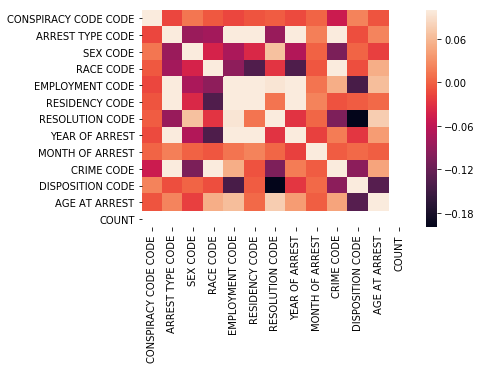

In [47]:
sns.heatmap(corr, 
            vmin = -0.2, vmax=0.1,                                # limits of the colour scale; vmin makes it darker
            square=False).xaxis.tick_bottom

### Looking at the scale on the right hand-side, the colours of interest are with a gradient higher than absolute 0.05, which means the darker colours
### The top four categories of correlations show (from strongest to weaker):
#### A. Black: 
     1. Disposition / Resolution - makes sense, based on how data were set up
#### B. Darkest purple: 
     1. Residency / Race
     2. Year of arrest / Race
     3. Disposition / Employment
     4. Arrest type / Sex
     5. Arrest type / Race
#### C. Dark purple:
     1. Crime / Sex
     2. Race / Employment
     3. Resolution / Crime
     4. Disposition / Crime
#### D. Purple:
     1. Employment / Sex
     2. Employment / Year
     3. Sex / Year
     4. Conspiracy / Crime

Recognizing that some of the above are known social issues (e.g., race/employment, employment/sex) or correlations due to how data were set up (e.g., Crime, Resolution, Disposition, Conspiracy)

It might be worthier to explore those related directly to arrests such as 
   * B2 + D2 + D3, i.e., Race, Employment, Sex against Year of Employment
   * B3 + B4, i.e., Disposition against Employment, Crime

In [48]:
# Do we get the same results using a Hinton algorithm?
# copied from http://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html 
# which
# adapted from http://matplotlib.org/examples/specialty_plots/hinton_demo.html
def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2**np.ceil(np.log(np.abs(matrix).max())/np.log(2))

    ax.patch.set_facecolor('white')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'red' if w > 0 else 'blue'
        size = np.sqrt(np.abs(w))
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor='black')
        ax.add_patch(rect)

    nticks = matrix.shape[0]
    ax.xaxis.tick_top()
    ax.set_xticks(range(nticks))
    ax.set_xticklabels(list(matrix.columns), rotation=90)
    ax.set_yticks(range(nticks))
    ax.set_yticklabels(matrix.columns)
    ax.grid(False)

    ax.autoscale_view()
    ax.invert_yaxis()

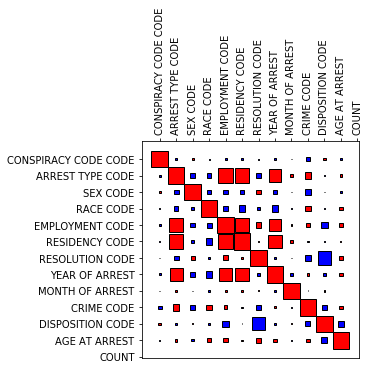

In [49]:
hinton(corr)

### Hinton's algorithm for correlations displays slightly different results than the python function used earlier. 

### However, they both show that there are problematic issues related to Residency (explored earlier), or Race and Employment which will be explored further down 

### How about the weaker correlations? Let's probe the trends for one of them, Sex against Year of Arrest

In [50]:
# first build the data frame
df_numeric = []
df_numeric = df_correlations.copy()

df_numeric.drop(['INCIDENT NUMBER',
                 'CONSPIRACY CODE', 
                 'STATUTE',
                 'VIOLATION',
                 'ARREST TYPE DESCRIPTION',
                 'CRIME CODE DESCRIPTION',
                 'CRIME CATEGORY CODE',
                 'CRIME CATEGORY DESCRIPTION',
                 'DISPOSITION DESCRIPTION',
                 'ARRESTEE SEX',
                 'ARRESTEE RACE',
                 'ARRESTEE EMPLOYMENT DESCRIPTION',
                 'ARRESTEE RESIDENCY DESCRIPTION',
                 'ARRESTEE HOME CITY',
                 'ARRESTEE HOME STATE',
                 'ARREST RESOLUTION',
                 'ARRESTEE HOME ZIP',
                 'DATE OF ARREST',
                 'ARRESTEE HOME CITY - MAPPED'], axis = 1, inplace = True)

#df_numeric.to_csv(os.path.join(data_directory,'arrests_numeric.csv')

In [51]:
# Plotting each demographic by its codes, per year
x_working = df_numeric.copy()
y_working = df_numeric.copy()

# all plots below have the 'YEAR OF ARREST' as x-axis
x_working = sorted(x_working['YEAR OF ARREST'].unique().tolist())

# y is changing for each plot so we can use one function for all

In [52]:
def y_data_for_specific_code(field, code): 
    y_working = df_numeric.copy()

    cond = y_working[field] != code
    rows = y_working.loc[cond, :]
    y_working.drop(rows.index, inplace=True)         
    y_working = y_working.groupby('YEAR OF ARREST')[field].value_counts().tolist()

    return y_working

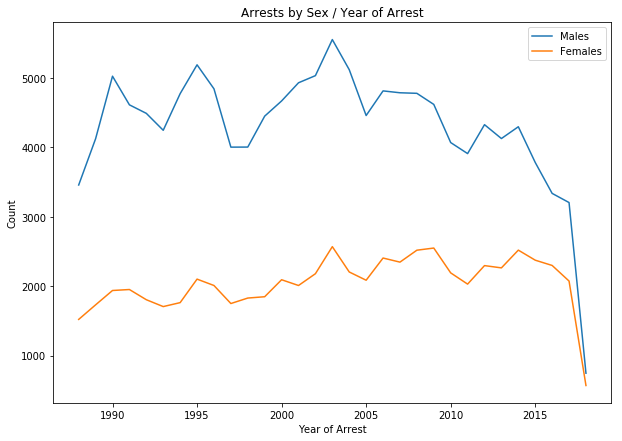

In [53]:
# Arrest count by sex
plt.figure(figsize = (10,7))
plt.xlabel('Year of Arrest')
plt.ylabel('Count')
plt.title('Arrests by Sex / Year of Arrest')
# SHOULD FORMAT FOR YEARS 1988 - 2018

# Sex - Males
y_working = y_data_for_specific_code('SEX CODE', 3)
plt.plot(x_working, y_working)

# Sex - Females
y_working = y_data_for_specific_code('SEX CODE', 2)
plt.plot(x_working, y_working)
plt.legend(labels = ['Males','Females'])
#plt.xticks = x_working
# Sex - Blank
# y_working = y_data_for_specific_code('SEX CODE', 1)
# if len(y_working) > 0:
#     y_working = y_working.groupby('YEAR OF ARREST')['SEX CODE'].value_counts().tolist()
#     plt.plot(x_working, y_working)
# Sex - Everything else - this leads to different sizes - not sure why - so will skip for now
# y_working = y_data_for_specific_code('SEX CODE', 0)
# plt.plot(x_working, y_working)

In [54]:
# # Employment plot
# # Race plot
# plt.xlabel('Year of Arrest')
# plt.ylabel('Count')
# plt.title('Arrests by Employment Status / Year of Arrest')
# # SHOULD FORMAT FOR YEARS 1988 - 2018

# # Employment - Unknown - different size. why?
# # y_working = y_data_for_specific_code('EMPLOYMENT CODE', 5)
# # plt.plot(x_working, y_working)

# # Employment - Unemployed - different size. why?
# # y_working = y_data_for_specific_code('EMPLOYMENT CODE', 4)
# # plt.plot(x_working, y_working)

# # Employment - Employed - different size. why?
# # y_working = y_data_for_specific_code('EMPLOYMENT CODE', 3)
# # plt.plot(x_working, y_working)

# # Employment - Full-time student - different size. why?
# # y_working = y_data_for_specific_code('EMPLOYMENT CODE', 2)
# # plt.plot(x_working, y_working)

# # Employment - Military - different size. why?
# # y_working = y_data_for_specific_code('EMPLOYMENT CODE', 1)
# # plt.plot(x_working, y_working)

# # Employment - Everything else
# y_working = y_data_for_specific_code('EMPLOYMENT CODE', 0)
# plt.plot(x_working, y_working)
# plt.legend(labels = [''])

### Is there a story these correlations do NOT tell? 
### For example, previous analysis showed a large number of minors in the system (~10%). 
### The Age of Arrest column was also one with a high rate of incorrect or missing data, which we had to understand before cleaning up

Text(0.5,1,'Arrests by Age')

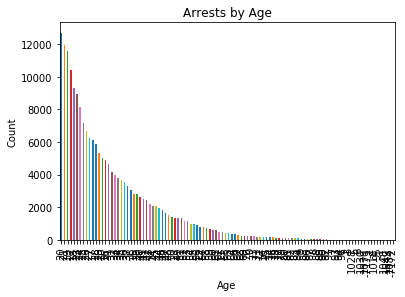

In [55]:
df_correlations['AGE AT ARREST'].value_counts().plot.bar()   
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Arrests by Age')

# Section 3: Top 3 Stories
## 1. Age at Arrest
## 2. Race
## 3. Employment

## 3.1 Age At Arrest

In [56]:
# Seaborn still cannot execute the clustermap, so let's divide data into two sets: minors and non-minors
# Delving into why there are minors in the system might be better achieved with a slider on the clustermap; let's see
df_age_less_than_18 = []
df_age_less_than_18 = df_numeric.copy()

cond = df_age_less_than_18['AGE AT ARREST'] >= 18
rows = df_age_less_than_18.loc[cond, :]
df_age_less_than_18.drop(rows.index, inplace=True)                     # 18980 records
# df_age_less_than_18

In [57]:
# what of the 18980 records, there are a few with age at arrest lass than 0; let's filter them out
df_age_errors = []
df_age_errors = df_age_less_than_18.copy()

cond = df_age_errors['AGE AT ARREST'] > 0
rows = df_age_errors.loc[cond, :]
df_age_errors.drop(rows.index, inplace=True)                     # 204 records

#df_age_errors.to_csv(os.path.join(data_directory,'arrests_numeric_negative_ages.csv'))

# df_age_errors

In [58]:
# what of the 18980 records, there are a few with age at arrest lass than 0; let's filter them out
df_minors = []
df_minors = df_age_less_than_18.copy()

cond = df_minors['AGE AT ARREST'] <= 0
rows = df_minors.loc[(cond), :]
df_minors.drop(rows.index, inplace=True)                     # 18776 records

#df_minors.to_csv(os.path.join(data_directory,'arrests_numeric_minors.csv'))

# df_minors

In [59]:
df_non_minors = []
df_non_minors = df_numeric.copy()

cond = df_non_minors['AGE AT ARREST'] < 18
rows = df_non_minors.loc[cond, :]
df_non_minors.drop(rows.index, inplace=True)                # 178582 records

# df_non_minors

#df_non_minors.to_csv(os.path.join(data_directory,'arrests_numeric_non_minors.csv'))

In [60]:
# check we have all records: 18976 + 4 + 178582 = 197562 - yes, we do  

# clean up memory
df_age_less_than_18 = pd.DataFrame()
df_age_errors = pd.DataFrame()
df_non_minors = pd.DataFrame()                            # now we should have only the minors dataframe in the memory 
# print("Size of dataframe numerics", sys.getsizeof(df_numeric))

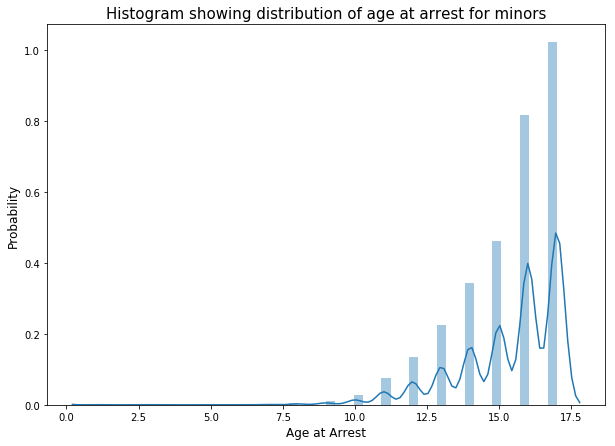

In [61]:
# plt.plot(df_minors)                                  # this graph makes no sense
# plt.show()
plt.figure(figsize = (10,7))
# histogram
sns.distplot(df_minors['AGE AT ARREST'])
plt.ylabel('Probability', size = 12)
plt.xlabel('Age at Arrest', size = 12)
plt.title('Histogram showing distribution of age at arrest for minors', size = 15);
# sns.plt.show()

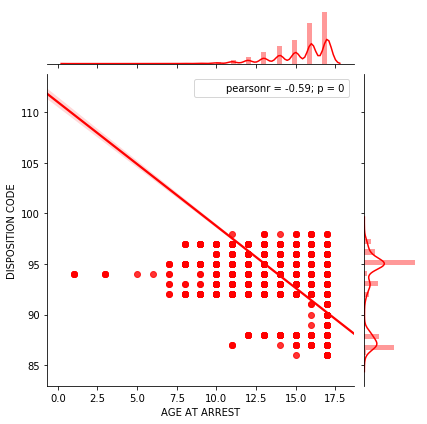

In [62]:
plt.figure(figsize = (10,7))
sns.jointplot(data = df_minors, x='AGE AT ARREST', y='DISPOSITION CODE', kind='reg', color='r')
plt.show()

In [63]:
# df_minors[df_minors['AGE AT ARREST'] < 7]
df_minors_show = df_correlations[['VIOLATION','DISPOSITION CODE', 'DISPOSITION DESCRIPTION' ,'CRIME CATEGORY DESCRIPTION', 'ARRESTEE SEX', 'ARRESTEE RACE', 'AGE AT ARREST']].loc[df_correlations['AGE AT ARREST'] < 7]
df_minors_show = df_minors_show[['AGE AT ARREST','DISPOSITION CODE','DISPOSITION DESCRIPTION', 'CRIME CATEGORY DESCRIPTION', 'ARRESTEE SEX', 'ARRESTEE RACE','VIOLATION']].loc[df_minors_show['AGE AT ARREST'] > 0]
display(df_minors_show)

# display(df_minors_show)

,AGE AT ARREST,DISPOSITION CODE,DISPOSITION DESCRIPTION,CRIME CATEGORY DESCRIPTION,ARRESTEE SEX,ARRESTEE RACE,VIOLATION
ARREST NUMBER,,,,,,,
A00-03295,5,94,REFERRED TO WELFARE AGENCY,Warrants & Summons,FEMALE,BLACK,DCFS - PROTECTIVE CUSTODY
A00-03296,1,94,REFERRED TO WELFARE AGENCY,Warrants & Summons,MALE,BLACK,DCFS - PROTECTIVE CUSTODY
A00-03297,3,94,REFERRED TO WELFARE AGENCY,Warrants & Summons,FEMALE,BLACK,DCFS - PROTECTIVE CUSTODY
A00-03955,6,94,REFERRED TO WELFARE AGENCY,Warrants & Summons,MALE,WHITE,JUV WARRANT OF APPREHENSN
A01-06175,3,94,REFERRED TO WELFARE AGENCY,Warrants & Summons,MALE,WHITE,WARRANT OF APPREHENSION
A96-01595,1,94,REFERRED TO WELFARE AGENCY,Warrants & Summons,FEMALE,BLACK,WARRANT OF APPREHENSION
A96-05613,1,94,REFERRED TO WELFARE AGENCY,Warrants & Summons,FEMALE,WHITE,WARRANT OF APPREHENSION
A96-06693,1,94,REFERRED TO WELFARE AGENCY,Warrants & Summons,MALE,BLACK,WARRANT OF APP 96-JA-96
A97-02864,3,94,REFERRED TO WELFARE AGENCY,Warrants & Summons,FEMALE,WHITE,APPREHENSION FOR NEGLECT


## Now what?
### Hopefully these children have not been marked in other police/government databases as having a crime record 
#### The City of Urbana does not provide any mechanism to discuss such questions the citizens would probe

In [64]:
# Clean up memory
# df_correlations = pd.DataFrame()
# print("Size of dataframe correlations", sys.getsizeof(df_correlations))

# x_working = pd.DataFrame()
# y_working = pd.DataFrame()
# df_numeric = pd.DataFrame()

## 3.2 Race

The majority of people arrested in Urbana between 1988-2018 are white. 

However, while Urbana is only 15.6% African-American, arrests of African-Americans account for 41% of all arrests in this dataset.

54% of white people are bonded out or on individual bonds; only 27% are taken to jail. However, for African-Americans, the numbers are practically reversed. Only 29% of African-Americans are bonded out or on individual bonds, while 53% are taken to jail.
More African-Americans than whites are arrested in every employment category except 'UNKNOWN' and 'FULL-TIME STUDENT' (in the latter category, the difference is marginal: 167 arrestees separate the two).

In [65]:
#remove period
race_no_period = df_maps[(df_maps['ARRESTEE RACE'] != '.') & (df_maps['ARRESTEE RACE'] != 'BUSINESS OR OTHER')]
clean_race_df = race_no_period.groupby('ARRESTEE RACE').count()

In [66]:
#sort race by highest to lowest
sorted_race = clean_race_df['COUNT'].sort_values()

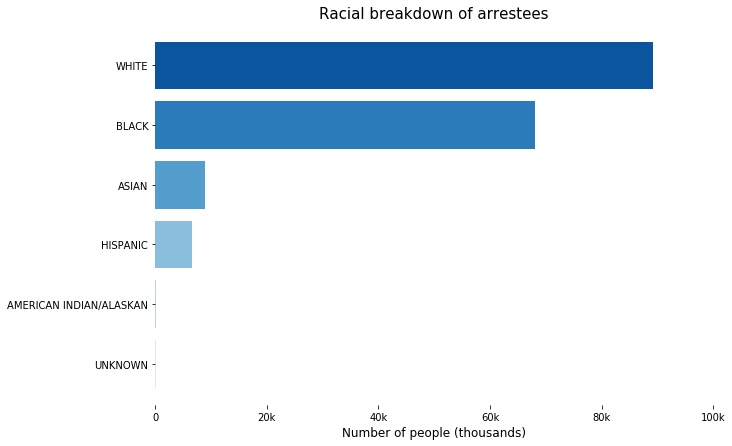

In [67]:
plt.figure(figsize = (10,7))
plt.barh(range(len(sorted_race.index)), sorted_race.values, color=blue.as_hex())
plt.yticks(range(len(sorted_race.index)), sorted_race.index)
plt.xlabel('Number of people (thousands)', size = 12)
plt.xticks([0, 20000, 40000, 60000, 80000, 100000], ['0', '20k', '40k', '60k','80k', '100k'])
plt.title('Racial breakdown of arrestees', size = 15)
erase_axes()

In [68]:
race_select_all = [race for race in sorted_race.index]
race_select_all.append('ALL')
race_select_all_rev = list(reversed(race_select_all))

In [69]:
#fig, ax = plt.subplots(1, figsize = (10,7))
#USE DIFFERENT COLORS TO REPRESENT DIFFERENT RACES
@ipywidgets.interact(selector = race_select_all_rev)
def make_plot(selector):
    if selector == 'ALL': 
        for race in race_select_all:
            if race != 'ALL':
                plt.plot(df_maps[df_maps['ARRESTEE RACE'] == race].groupby('YEAR OF ARREST')['COUNT'].count(), marker = '.', label=race)
            plt.legend(loc=1, prop={'size': 6})
    else: 
        plt.plot(df_maps[df_maps['ARRESTEE RACE'] == selector].groupby('YEAR OF ARREST')['COUNT'].count(), marker = '.', color=blue[5], label=selector)
    plt.ylabel('number of people (thousands)')
    plt.yticks([0, 1000, 2000, 3000, 4000], ['0', '1k', '2k', '3k', '4k'])
    plt.xlabel('years')
    plt.title('Racial breakdown of arrests over time')
    erase_axes()

interactive(children=(Dropdown(description='selector', options=('ALL', 'WHITE', 'BLACK', 'ASIAN', 'HISPANIC', 'AMERICAN INDIAN/ALASKAN', 'UNKNOWN'), value='ALL'), Output()), _dom_classes=('widget-interact',))

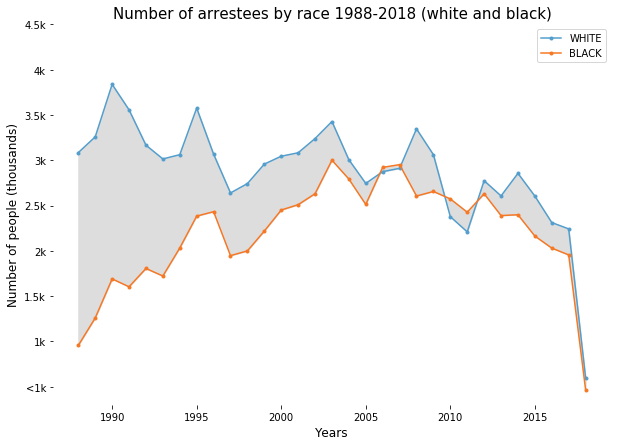

In [70]:
plt.figure(figsize = (10,7))
for race, color in zip(['WHITE','BLACK'], [blue[3], orange[3]]):
    plt.plot(df_maps[df_maps['ARRESTEE RACE'] == race].groupby('YEAR OF ARREST')['COUNT'].count(), marker = '.', color=color, label=race)
    plt.legend()
    
plt.fill_between(df_maps[df_maps['ARRESTEE RACE'] == race].groupby('YEAR OF ARREST')['COUNT'].count().index, 
                 df_maps[df_maps['ARRESTEE RACE'] == 'BLACK'].groupby('YEAR OF ARREST')['COUNT'].count(), 
                 df_maps[df_maps['ARRESTEE RACE'] == 'WHITE'].groupby('YEAR OF ARREST')['COUNT'].count(), color = "#dddddd")

plt.ylabel('Number of people (thousands)', size = 12)
plt.yticks([500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500], ['<1k', '1k', '1.5k', '2k', '2.5k', '3k', '3.5k', '4k', '4.5k'])
plt.xlabel('Years', size =12)

plt.title('Number of arrestees by race 1988-2018 (white and black)', size = 15)

erase_axes()

In [71]:
race_res_w_df = df_maps[df_maps['ARRESTEE RACE'] == 'WHITE'].groupby('ARREST RESOLUTION').count()
race_res_b_df = df_maps[df_maps['ARRESTEE RACE'] == 'BLACK'].groupby('ARREST RESOLUTION').count()

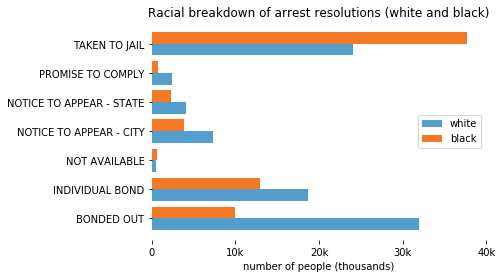

In [72]:
width = 0.4

ind_len = np.arange(len(race_res_b_df.index))
plt.barh(ind_len, race_res_w_df['COUNT'], width, color=blue[3], label='white',)
plt.barh(ind_len + width, race_res_b_df['COUNT'], width, color=orange[3], label='black', )
plt.yticks(ind_len + width / 2, race_res_b_df.index)
plt.xlabel('number of people (thousands)')
plt.xticks([0, 10000, 20000, 30000, 40000], ['0', '10k', '20k', '30k','40k'])
plt.legend()

plt.title('Racial breakdown of arrest resolutions (white and black)')

erase_axes()

Military was removed as an employment category to maintain clarity.

In [73]:
#remove military 
emp_no_military = df_maps[df_maps['ARRESTEE EMPLOYMENT DESCRIPTION'] != 'MILITARY']
clean_emp_no_military = emp_no_military.groupby('ARRESTEE EMPLOYMENT DESCRIPTION').count()

In [74]:
emp_race_w_df = emp_no_military[emp_no_military['ARRESTEE RACE'] == 'WHITE'].groupby('ARRESTEE EMPLOYMENT DESCRIPTION').count().sort_values('COUNT', ascending=False).head()
emp_race_b_df = emp_no_military[emp_no_military['ARRESTEE RACE'] == 'BLACK'].groupby('ARRESTEE EMPLOYMENT DESCRIPTION').count().sort_values('COUNT', ascending=False).head()

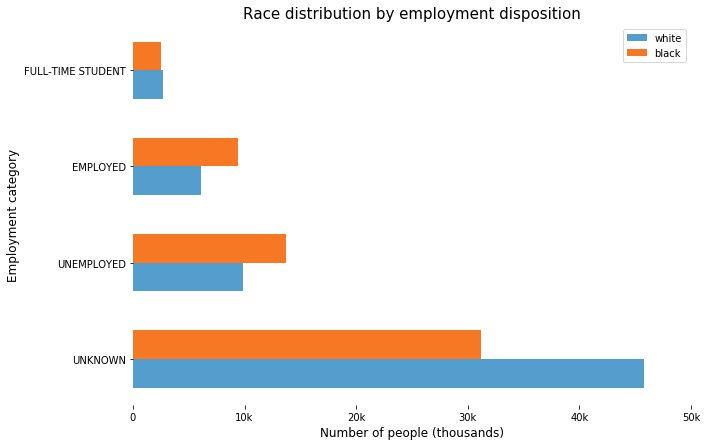

In [75]:
plt.figure(figsize = (10,7))
width = 0.3

ind_len = np.arange(len(emp_race_b_df.index))
plt.barh(ind_len, emp_race_w_df['COUNT'], width, color=blue[3], label='white') 
plt.barh(ind_len + width, emp_race_b_df['COUNT'], width, color=orange[3], label='black') 
plt.ylabel('Employment category', size =12)
plt.yticks(ind_len + width / 2, emp_race_b_df.index)
plt.xticks([0, 10000, 20000, 30000, 40000, 50000],['0', '10k', '20k', '30k', '40k', '50k'])
plt.xlabel('Number of people (thousands)',size =12)
plt.title('Race distribution by employment disposition', size = 15)

plt.legend()

erase_axes()

## Section 4: Recommendations 
1. <b>Issue:</b> The largest number of those arrested are held waiting for prosecution
    <br><b>Recommendation:</b> Hiring more judges to clear the backlog of those waiting to be prosecuted would decrease societal burdens
<br><br>
2. <b>Issue:</b>There seem to be three main causes of arrest, with the largest number being an "attempt" to break the law
<br><b>Recommendation:</b> Better understanding of the three main causes of arrest - which could then be actioned through policies, learning, skill training etc
<br><br>
3. <b>Issue:</b> The number of crime codes, categories, statute, violations, disposition is significant and cannot be seen in a simple bar chart
<br><b>Recommendation:</b> Apply information/data management principles, use MECE (Mutually Exclusive Collectively Exhaustive) techniques to simplify the data
<br><br>
4. <b> </b> The issues that we've noticed in our top 3 stories about minors, race and employment are difficult to tackle as we don't have more information about those specific cases. 

## Section 5: Now what?

Urbana's open data project is nothing short of wonderful. But what do citizens (or other interested parties) do after they have viewed and analyzed the data, and now they want to tell the city about what they have seen? In other words, how do we do something with these visualizations?<br><br>
It is much less clear how to turn analysis into action. While the city has provided many (and easy) ways to see and share datasets, there is no direction on how to share results directly with city officials, or information on what would happen if results were shared. The "Contact Us" section of the open data website, for example, links directly to a contact form that seems to be encouraged for all communications from citizens.
<br><br>
What we can't do with this dataset, however, is say why. If the data are accurate, why are children younger than 10 engaging in behaviors that culminate in arrest? Why do young men in their twenties, in particular, engage in allegedly criminal behavior and are arrested for it so much more than young women? And why are African-Americans, who occupy such a small amount of the city of Urbana, so disproportionally represented in their arrest records?
This dataset gives up snapshots of events in time and can only hint at the contexts that can help us make sense of what was captured. Our visualizations allow us to see and, at times, interact with these snapshots in ways that can make broader patterns visible. But how these patterns started, whether they will continue on in the future or if there will be divergences, and why they exist at all will need to be gleaned through other means. Our visualizations can then function as a finger pointing toward the moon: we hope they will serve as reminders that technology is best used to help humanity envision and pursue a more just and equitable world.

### Next Steps:

This project fulfills the first reason we set out to explore this dataset: to complete a class. But submitting this project brings us no closer to fulfilling the second one: to understand the process by which analysts can work with the city of Urbana to turn insights into actions. Learning that process--or, if one does not exist, encouraging the development of one--is the next step.

## Additional Information:

### Character 1: The city of Urbana
###### a.	About Urbana
Urbana is a small college town located in central Illinois. Urbana is nestled within Champaign county, which had an estimated population of just over 200,000 people at the [last recent U.S. census](https://www.census.gov/quickfacts/fact/table/champaigncountyillinois/PST045216). The city of Urbana itself hovers comfortably at just north of 40,000 residents.<br><br>
But Urbana has ambitions. One of the ways that it expresses these ambitions is through data.
"Urbana is a smart, innovative, and globally connected micro-urban community. We are sharing City data on this website to engage, inform, and collaborate with our citizens," declares the [open data website](https://data.urbanaillinois.us/) launched by the city. In this one location, residents and far-flung data geeks alike can find datasets on seemingly every topic of interest to a city government, from infrastructure to the environment.<br><br>
But Urbana didn't just release information on roads and trees. In May 2015, the city government created a dataset of arrests made by Urbana Police over the past 30 years (1988-2018). They published that dataset here: [arrest data](https://data.urbanaillinois.us/Police/Urbana-Police-Arrests-Since-1988/afbd-8beq).


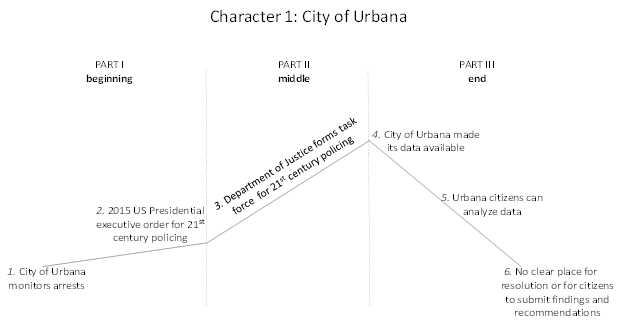

<b>Data curation</b><br><br>
What is most notable about this dataset, before it is even opened, is how curated it is. The city of Urbana has taken pains to make their data understandable to and usable by as wide of an audience as possible.<br><br>
The metadata are neatly organized and plentiful. The first thing we noticed, after the title of the dataset, is the multiple ways in which it can be accessed. Users can explore the dataset by visualizing it from within the site. Selecting this option allows users to visualize from the built-in visualization tool (requires the creation of a free account) or to further select the visualization program of their choice, like Carto and Plot.ly. Users can also export the dataset to various formats, including .csv, explore the dataset through the API, or share the link to the dataset on social media.<br><br>
But the metadata doesn't stop there. The city provides crucial sharing information like the dataset's license (open), a preview of the columns and rows, and how many downloads and views the dataset has received to date (7,162 and 267, respectively). They also provide links to related or child datasets that rely on the dataset in question.<br><br>
Whether through the website or on a local server, the message rings clear: the city of Urbana wants people to use these data.
We applaud Urbana's desire to develop itself as a micro-urban community through the use of open data. City and state governments are not always willing or quick to be transparent with their data, particularly those which might draw scrutiny of governing practices (consider, for example, the reactions of certain government officials to damning reports of water contamination in the comparably-sized [Flint, Michigan](https://www.usnews.com/news/best-states/michigan/articles/2017-06-14/a-timeline-of-the-water-crisis-in-flint-michigan)).<br><br>
In contrast, the city of Urbana not only provides data freely but curates it in ways that encourage wide-spread viewing and sharing, analysis, and response. Indeed, rather than hide from its citizens, the city contends that it provides these resources in order to promote action from them, action that, the city hopes, will improve life here for everyone.
We embrace the narrative that the city of Urbana is telling through its open data project, and particularly through the Urbana Police Arrests Since 1988 dataset: that, in the words of the [Department of Justice under President Obama (2015)](https://www.justice.gov/archives/opa/blog/growing-number-communities-are-using-data-improve-policing-and-criminal-justice), "data and technology play vital roles in advancing trust within communities and improving our overall criminal justice system" ("Growing number of communities are using data to improve policing and criminal justice", 2015).<br>


### Character 2: The people being arrested

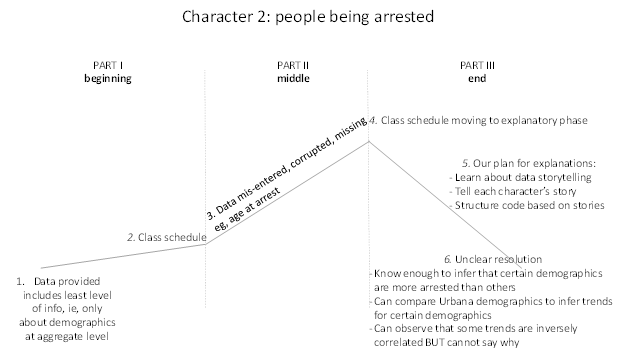

The people represented in this dataset, those who were arrested in the past thirty years, occopy a strange space in this story because we know both so much and so little about their own stories.
After analyzing the data, we are able to make several observations about the people represented here. But we can only ever know them in the aggregate, and even then this knowledge must be accompanied by caveats. Data have been anonymized to protect privacy, which makes perfect legal and ethical sense, but which also necessarily flattens rich and textured lives into columns and rows. And then there are dirty data. In multiple cells, data have either been misentered or not entered at all, leading to further loss. Due to these factors, he outlines of individual lives become blurrier and, in some cases, are lost to view.<br><br>
As such, we can only speak in terms of demographics. But there are patterns there that emerge and which we have worked to pick out in shades of blue and red.<br><br>
We can say, for instance, that (perhaps unsurprisingly) arrestees predominantly come from Illinois. But some also come from Texas and Florida. We can narrow our vision and move from considering geographical and political boundaries to corporeal ones. We can say that arrest rates are going down. 2016, 2017, and 2018 (the last of which is still on-going, of course), have three of the four lowest arrest amounts per year since 1988. But we can also say that not all groups have experienced decline in arrest activity equally.<br><br>
People who are young, people who are identified as male, and people who are identified as African-American have all experienced high levels of arrest.

<b>Age</b>
81% of arrests occurred on arrestees between the ages of 10-39. People in their 20s are most frequently arrested (42%). 323 arrestees were categorized as under the age of 10.<br><br>
<b>Sex</b>
People identified as men are arrested at more than double the rate of people identified as women.<br><br>
<b>Race</b>
While Urbana is only 15.6% African-American, arrests of African-Americans account for 41% of all arrests in this dataset. The majority of African-Americans arrested were from Urbana or Champaign (70%).
54% of white people were bonded out or on individual bonds; only 27% were taken to jail. However, for African-Americans, the numbers are practically reversed. Only 29% of African-Americans were bonded out or on individual bonds, while 53% were taken to jail.
More African-Americans than whites are arrested in every employment category except 'UNKNOWN' and 'FULL-TIME STUDENT' (in the latter category, the difference is marginal: 167 arrestees separate the two).


### Character 3: Us as a team

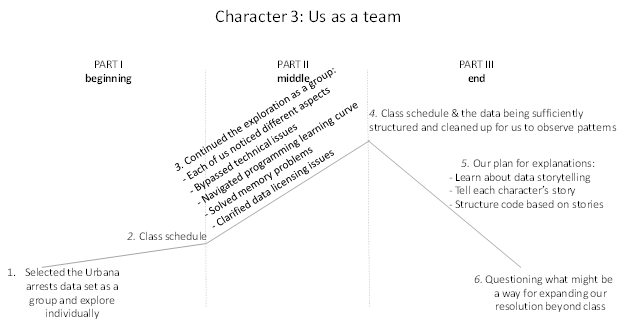

Our team was brought together, as so many teams are, by need. We were tasked with exploring and choosing a dataset for this project, and due to Urbana's friendliness toward data and data analysts, and the potential real-world implications of our analyses, we chose this dataset.
Each of us noticed different aspects of the dataset, however.
-	Age at arrest, especially focused on minors
-	Race
-	Employment <br>

There were some complications along the way. These were all techical in nature: becoming more comfortable with Python, learning how to use Jupyter or how to use it in the iSchool environment, and solving memory issues as we went along.


# That's all folks!